## <span style="color:darkblue"> Problem Set 1: Introduction to Data

Stat140-02: Introduction to the Ideas and Applications of Statistics 

Due: Friday, Feb 9 @11am

**Problem set policies:** Please provide concise, clear answers for each question. Note that only writing the result of a calculation (e.g., "SD = 3.3") without explanation is not sufficient. For problems involving `R`, include the code in your solution, along with any plots.
		
Each problem set is due by 11:00am on the due date; please submit your problem set via gyrd
		
*You are encouraged to discuss problems with other students (and, of course, with the course head and the TAs), but you must write your final answer in your own words. Solutions prepared "in committee" are not acceptable. If you do collaborate with classmates on a problem, please list your collaborators on your solution.*

#### Problem 1
The adolescentFertility dataset includes data on the number of children born to women aged 15-19 from 189 countries around the world for the years 1997, 2000, 2002, 2005, and 2006. The data are defined such that the values for the annual adolescent fertility rates represent the number of live births among women aged 15-19 per 1,000 women members of the population of that age.

For the years 2000-2006, the adolescent fertility rate for Iraq is coded `NA`, or missing. When calculating a mean or standard deviation in `R` for a variable `x` which has missing data, add `na.rm=TRUE` to the argument to perform the calculations without the missing observations, e.g. `mean(x, na.rm=TRUE)` and `sd(x, na.rm=TRUE).`

Below is the code that you will need to use to load the data:

In [1]:
adolescentFertility = read.csv("https://www.mtholyoke.edu/courses/afoulkes/ClassData/adolescentFertility.csv")
head(adolescentFertility)

Country,fert_1997,fert_2000,fert_2002,fert_2005,fert_2006
Albania,15.742,15.6448,15.580,15.5944,15.5992
Algeria,11.771,9.8312,8.538,7.8192,7.5796
Angola,145.314,143.8236,142.830,139.6416,138.5788
Argentina,69.800,64.3400,60.700,58.4200,57.6600
Armenia,52.955,39.7106,30.881,30.0746,29.8058
Aruba,35.063,31.1534,28.547,24.8828,23.6614


a) Based on numerical summaries, describe the distribution of adolescent fertility in 2006 (`fert_2006`). 

**Soution:**

In [2]:
require(dplyr)
adolescentFertility %>% 
    summarize(min=min(fert_2006,na.rm=TRUE), max=max(fert_2006,na.rm=TRUE), 
              q1=quantile(fert_2006,p=.25,na.rm=TRUE), q3=quantile(fert_2006,p=.75,na.rm=TRUE),
              mean=mean(fert_2006,na.rm=TRUE),median=median(fert_2006,na.rm=TRUE),
              sd=sd(fert_2006,na.rm=TRUE))

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



min,max,q1,q3,mean,median,sd
1.4534,223.8336,17.8759,75.7267,53.58395,40.0682,46.97848


The average adolescent fertility rate in 2006 across all countries represented is 53.58 live births per 1,000 adolescent women aged 15-19 in the population; the corresponding standard deviation is 46.98. The minimum across all countries is 1.45 while the maximum is 223.83. $50\%$ of countries have a fertility rate that exceeded 40.07 in 2006. The middle $50\%$ of fertility rates are between 17.88 and 75.72 live births per 1,000 adolescent women. The mean fertility rate is larger than than the median suggesting that the distribution is rightward skewed with some large extreme values.

b) What is the ${75}^{th}$ percentile of the distribution of adolescent fertility in 2006? Write a sentence explaining the ${75}^{th}$ percentile in the context of this data.

**Solution:**

The $75^{th}$ percentile of the distribution of adolescent fertility in 2006 is 75.73, which suggest that an estimated $25\%$ of countries had an adolescent fertility rate of greater than 75.73 live births per 1,000 adolescent women in 2006.

c) Why might those observations for Iraq be missing between 2000 and 2006? Would the summaries in part (a) have been affected very much if the values had been available?

**Solution:**

It is likely that the observations are missing due to the Iraq War and general instability in the region during this time period. It is unlikely that the numerical summaries would have been affected very much, even if the values were extreme; the median and IQR are robust estimates, and the dataset is relatively large, with data from 188 other countries.

d) Create side-by-side boxplots of the fertility rates for each of the five years in the dataset. What pattern do you see? Be sure to state the results in the context of the data.

In order to create the side by side boxplots using `ggplot()` as done in class, you will need to first `gather()` the $2-6$ columns to make a new *long* data set as follows, and then apply `ggplot()` to this new data set (`adolescentFertilityLong`). 

In [3]:
require(tidyr)
adolescentFertilityLong = gather(adolescentFertility,"fert","n",2:6)

Loading required package: tidyr


**Solution:**

Loading required package: ggplot2
Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

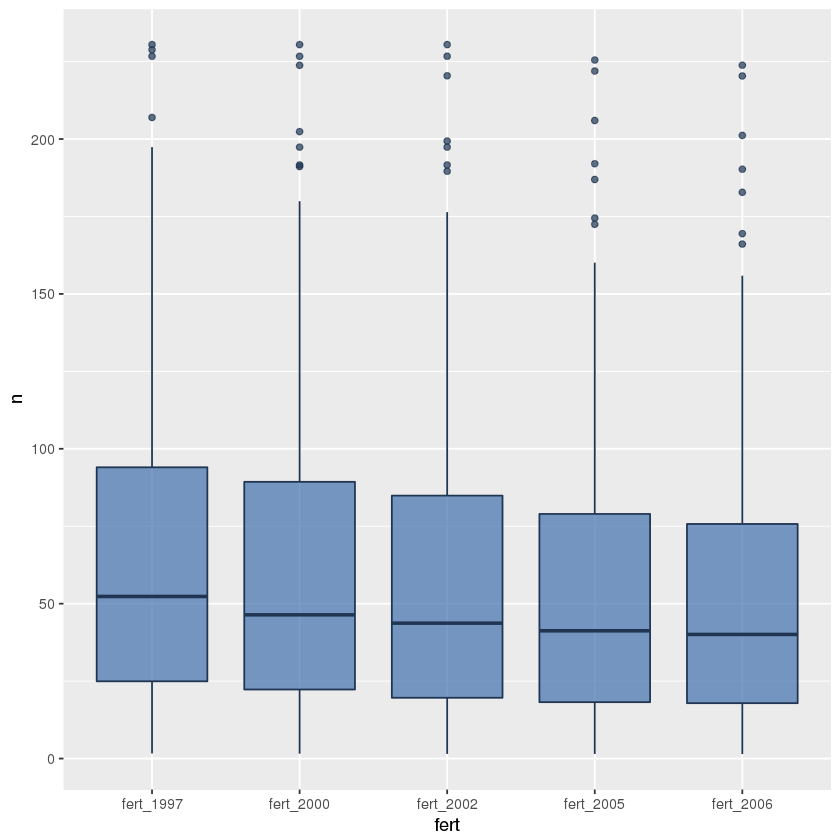

In [4]:
require(ggplot2)
ggplot(data=adolescentFertilityLong,aes(x=fert, y=n))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

The median adolescent fertility rate across all countries decreases each measured year. The 75th percentile appears to decrease more over these years than the 25th percentile, suggesting the IQR decreases each year. The largest adolescent fertility rate is constant between the three years 1997, 2000 and 2002 while it decreases slightly in 2005 and 2006. 

## Problem 2

In a 2003 study examining weight and body image concerns among young Korean women, researchers administered a questionnaire to 264 female college students in Seoul, South Korea [1]. The survey was designed to assess excessive concern with weight and dieting, consisting of questions such as "If I gain a pound, I worry that I will keep gaining "[2].

Questionnaires were given numerical scores on the Drive for Thinness Scale. Roughly speaking, a score of 15 is typical of Western women with eating disorders, but unusually high (${90}^{th}$) percentile for other Western women. The data can be loaded into R using the code below.

[1] Ryu HH, et al. Factors associated with weight concerns and unhealthy eating patterns among young Korean females. *Eating Disorders* 2003; **11**: 129-141.
[2] Garner DM, et al. Development and validation of a multidimensional eating disorder inventory for anorexia nervosa and bulimia. *International Journal of Eating Disorders* 1983; **2**: 15-34.


In [5]:
SeoulBodyImage = read.csv("https://www.mtholyoke.edu/courses/afoulkes/ClassData/SeoulBodyImage.csv")
head(SeoulBodyImage)

ID,dtscore
1,9
2,12
3,2
4,9
5,5
6,6


Graph the data and describe the shape, center, and spread of the scores for these Korean students. Are there any outliers? Calculate numerical summaries for the data and describe which values best summarize the data. Present the written component of your solution in a concise paragraph, referencing specific numerical values when appropriate.

**Solution:**

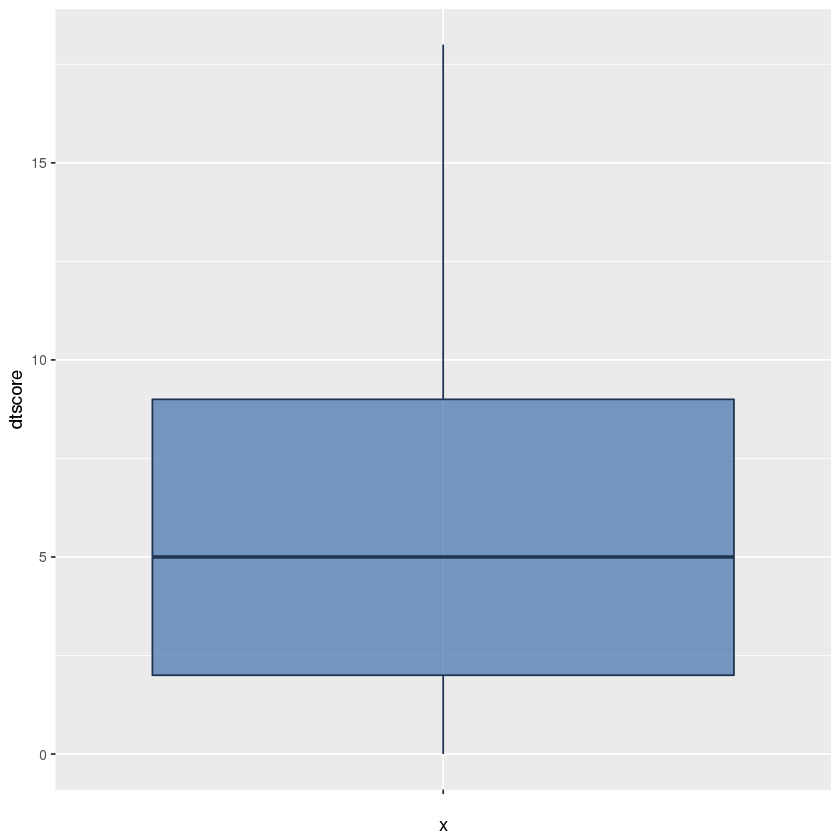

In [6]:
ggplot(data=SeoulBodyImage,aes(x="", y=dtscore))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

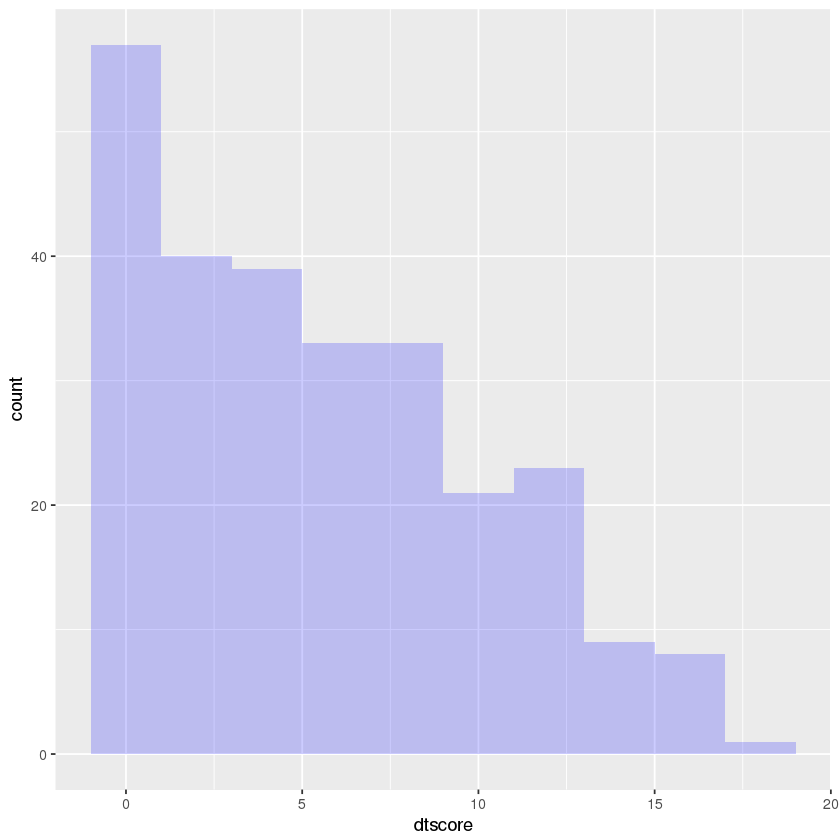

In [7]:
ggplot(data=SeoulBodyImage,aes(dtscore)) +
    geom_histogram(binwidth = 2,fill="blue",alpha=.2)

In [8]:
SeoulBodyImage %>% 
    summarize(min=min(dtscore,na.rm=TRUE), max=max(dtscore,na.rm=TRUE), 
              q1=quantile(dtscore,p=.25,na.rm=TRUE), q3=quantile(dtscore,p=.75,na.rm=TRUE),
              mean=mean(dtscore,na.rm=TRUE),median=median(dtscore,na.rm=TRUE),
              sd=sd(dtscore,na.rm=TRUE))

min,max,q1,q3,mean,median,sd
0,18,2,9,5.962121,5,4.634808


As shown by both plots, the scores for excessive concern about weight and dieting among Korean college students are right-skewed, and the data are fairly spread out, with a range of 18. The boxplot indicates that there are no outliers. Since the data are skewed, the median and IQR will provide a better summary of the data than the mean and SD. The median is 5 which indicates that $50\%$ of scores are less than 5, and the IQR is 7 (Q3 - Q1 = 9-2 = 7), indicating that $50\%$ of college students surveyed are within the seven point range from 2 to 9.

#### Problem 3

Suppose that you are interested in determining whether a relationship exists between the fluoride content in a public water supply and the dental caries experience of children using this water. The water data (loaded into R below) contains the data from a study examining 7,257 children in 21 cities from the Flanders region in Belgium.

The fluoride content of the public water supply in each city, measured in parts per million (ppm), is saved under the variable name `fluoride`; the number of dental caries per 100 children examined is saved under the name `caries`. The total dental caries number is obtained by summing the numbers of filled teeth, teeth with untreated dental caries, teeth requiring extraction, and missing teeth.

In [9]:
water = read.csv("https://www.mtholyoke.edu/courses/afoulkes/ClassData/water.csv")
head(water)

city,fluoride,caries
1,0.0,810
2,0.0,673
3,0.0,722
4,0.1,706
5,0.1,823
6,0.1,1037


a) Construct a two-way scatterplot for these data, with `fluoride` as the $x$-variable and `caries` as the $y$-variable. 

**Solution:**

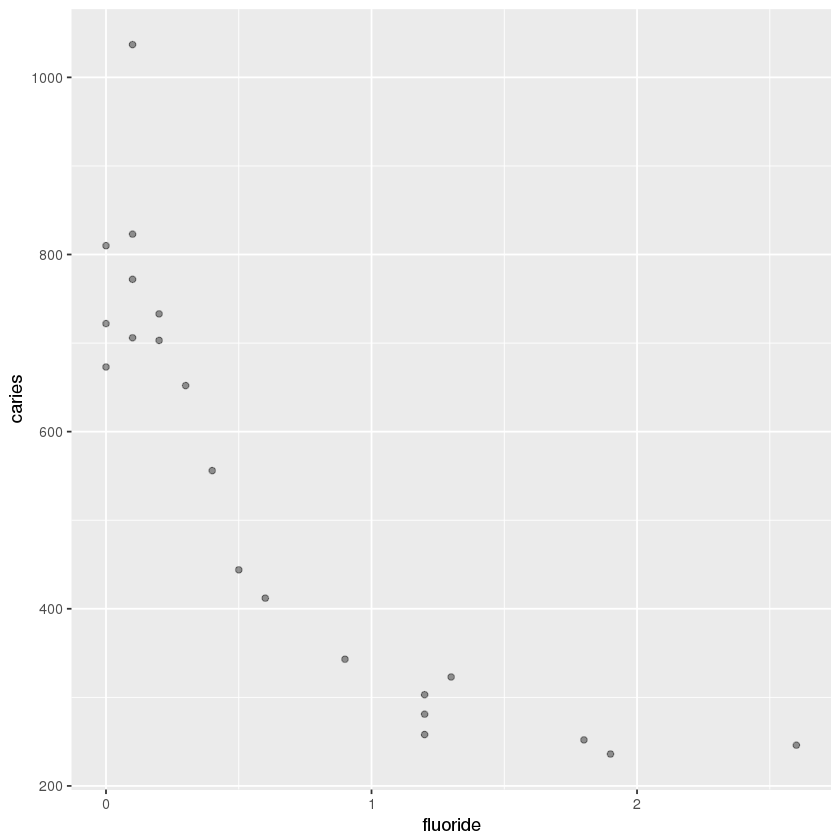

In [10]:
ggplot(data=water,aes(x=fluoride, y=caries))+
    geom_point(alpha = 0.4)

b) Do `fluoride` and `caries` appear to be positively or negatively associated? Explain your answer.

**Solution:**

The two variables, fluoride and caries, seem to be negatively associated, because the number of caries decreases as fluoride levels increase.

c) Later in the course, we will study methods for fitting a straight line to data. If you were to add a straight line to the plot that you think best fits the data, what would be its $x$-intercept and $y$-intercept? Based on the appearance of the plot, do you think that a straight line would be a reasonable way to represent these data?

**Solution:**

Any reasonable answers for the x-intercept and y-intercept are acceptable, e.g. an x-intercept of (1.8, 0) and y-intercept of (0, 800). A straight line does not seem to be a good fit for the data. At low and high levels of fluoride, the data points are above the line; for intermediate levels, they are below the line. This suggests a non-linear association. In particular, it seems like a curve could fit the data much better.

### Problem 4

Does smoking have the same association with cardiovascular disease in women as it does in men? Epidemiologists typically use data from observational studies to investigate possible causes of disease. 

With the stenosis dataset (loaded into R below), you will be able to examine the association between smoking status, the presence of aortic stenosis, and sex. Aortic stenosis is a narrowing or stricture of the aorta that impedes blood flow to the body.

The dataset contains three variables, for 215 study participants:

- **disease**: coded 1 if stenosis is present, 0 if it is absent.
- **smoke**: coded 1 if the participant is a current or former smoker, 0 if the participant has never smoked.
- **sex**: coded 1 for males, 0 for females.

In [11]:
stenosis = read.csv("https://www.mtholyoke.edu/courses/afoulkes/ClassData/stenosis.csv")
head(stenosis)

ID,smoke,disease,sex
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1


a) Construct a two-way table, with `smoke` as the row variable and `disease` as the column variable. What percentage of the 215 participants were both smokers and had aortic stenosis? This percentage is one component of the *joint distribution* of smoking and stenosis; what are the other three numbers of the joint distribution?

**Solution:**

In [12]:
require(tidyr)
stenosis %>%
    count(smoke,disease) %>%
    spread(key=disease,value=n)

smoke,0,1
0,67,54
1,43,51


The total number of participants is $67+54+43+51 = 215$.  The percentage of participants that were both smokers and had aortic stenosis is 51/215 = 23.7%. The other three numbers are 67/215 = 31.1% (non-smoker, no stenosis), 54/215 = 25.1% (non-smoker, stenosis), and 43/215 = 20.0% (smoker, no stenosis).

b) Among the smokers, what proportion have aortic stenosis? This number is a component of the conditional distribution of stenosis for the two categories of smokers. What proportion of non-smokers have aortic stenosis? 


**Solution:**

Among the 94 smokers, 54.3% have aortic stenosis (51/94). Among the 121 non-smokers, 44.6% have aortic stenosis (54/121).

c) Repeat part (b) for males and females separately. To do this, first subset the data to create two datasets: one with only males, and one with only females. Are there any differences by sex in the proportion of smokers who suffer from aortic stenosis?

**Solution:**

In [13]:
stenosisMale = filter(stenosis,sex==1)
stenosisMale %>%
    count(smoke,disease) %>%
    spread(key=disease,value=n)

smoke,0,1
0,20,25
1,24,37


In [14]:
stenosisFemale = filter(stenosis,sex==0)
stenosisFemale %>%
    count(smoke,disease) %>%
    spread(key=disease,value=n)

smoke,0,1
0,47,29
1,19,14


Among male smokers, 60.7% have stenosis (37/61). Among male non-smokers, 55.6% have stenosis (25/45). Among female smokers, 42.4% have stenosis (14/33). Among female non-smokers, 38.2% have stenosis (29/76).

For both males and females, the percentage of smokers with stenosis is greater than the percentage of non-smokers with stenosis. However, the percentage of male smokers with stenosis is higher than the percentage of females with the disease. (This is also true for non-smokers.)

d) Epidemiologists sometimes use a statistic called relative risk. In this context, relative risk is the ratio of the proportion of smokers with stenosis to the proportion of non-smokers with stenosis. Relative risks greater than 1 indicate that smokers are at a higher risk for aortic stenosis than non-smokers, because, among smokers, a higher proportion of them will suffer from stenosis than the proportion among non-smokers.
	
The interpretation of relative risk is a bit subtle. Suppose, for example, that among men with high cholesterol, 30% develop heart disease, while among men with low cholesterol, 24% develop heart disease. The relative risk of heart disease, comparing high versus low cholesterol, is 0.30/0.24 = 1.25. Epidemiologists would say that high cholesterol is associated with a 25% increase in the probability of heart disease. Relative risks of 1.2 or higher are generally considered cause for alarm.
	
Ignoring sex, calculate the relative risk for the 215 participants, comparing smokers to non-smokers. Repeat the calculation for males and females separately. The three relative risks (overall, within males, within females) show an interesting pattern -- what is it?

**Solution:**

The overall relative risk is .543/.446 = 1.22. The relative risk for males is .607/.556 = 1.09. The relative risk for females is .424/.382 = 1.11. The interesting point about this pattern is that the relative risk in the whole study population is higher than in either of the subgroups defined by sex.

This is an example of Simpson’s paradox, in which the existence of a confounding variable (in this case, sex) influences the association of the observed explanatory variable (smoking) on the response variable (disease). We did not ask you to explain the reason for the pattern, as the reason is not so easily put into plain language.

The most direct explanation of Simpson’s paradox in this case is that, first, more males tend to suffer from aortic stenosis than women – the male proportions with stenosis are higher in both smokers and non-smokers than women. 

Secondly, males tend to smoke more than women (57.5% of males versus 30.2% of females). When males and females are included in a single table, the males in the sample increase both the number of smokers and the number of subjects with stenosis, increasing the apparent relative risk of stenosis among smokers.

It is important to note that smoking increases the risk of stenosis overall, and for males and females separately. Some people might feel, however, that a 9-11% increase in relative risk is acceptable, while a 22% increase is not!